In [1]:
#https://dacon.io/competitions/official/235985/overview/description
#제주도의 교통 정보로부터 도로 교통량 회귀 예측

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os

In [3]:
def csv_to_parquet(name):
    if not os.path.exists(f'./Data/{name}.parquet'):
        data = pd.read_csv(f'./Data/{name}.csv')
        data.to_parquet(f'./Data/{name}.parquet')
        del data
        gc.collect()


csv_to_parquet('train')
csv_to_parquet('test')

df_train = pd.read_parquet('./Data/train.parquet')
df_test = pd.read_parquet('./Data/test.parquet')
df_info = pd.read_csv('./Data/data_info.csv')

In [4]:
#csv 파일은 용량이 크기에 parquet로 작업

In [5]:
print(df_train.head())

              id  base_date day_of_week  base_hour  lane_count  road_rating  \
0  TRAIN_0000000   20220623           목         17           1          106   
1  TRAIN_0000001   20220728           목         21           2          103   
2  TRAIN_0000002   20211010           일          7           2          103   
3  TRAIN_0000003   20220311           금         13           2          107   
4  TRAIN_0000004   20211005           화          8           2          103   

   road_name  multi_linked  connect_code  maximum_speed_limit  ...  road_type  \
0  지방도1112호선             0             0                 60.0  ...          3   
1   일반국도11호선             0             0                 60.0  ...          0   
2   일반국도16호선             0             0                 80.0  ...          0   
3        태평로             0             0                 50.0  ...          0   
4   일반국도12호선             0             0                 80.0  ...          0   

   start_node_name  start_latitude  st

In [6]:
print(df_test.head())

            id  base_date day_of_week  base_hour  lane_count  road_rating  \
0  TEST_000000   20220825           목         17           3          107   
1  TEST_000001   20220809           화         12           2          103   
2  TEST_000002   20220805           금          2           1          103   
3  TEST_000003   20220818           목         23           3          103   
4  TEST_000004   20220810           수         17           3          106   

  road_name  multi_linked  connect_code  maximum_speed_limit  ...  \
0       연삼로             0             0                 70.0  ...   
1  일반국도12호선             0             0                 70.0  ...   
2  일반국도16호선             0             0                 60.0  ...   
3  일반국도11호선             0             0                 70.0  ...   
4       번영로             0             0                 70.0  ...   

   height_restricted  road_type  start_node_name  start_latitude  \
0                0.0          0             산지2교      

In [7]:
print(df_info)

                      변수명           변수 설명
0                      id             아이디
1               base_date              날짜
2             day_of_week              요일
3               base_hour             시간대
4             road_in_use          도로사용여부
5              lane_count             차로수
6             road_rating            도로등급
7            multi_linked         중용구간 여부
8            connect_code          연결로 코드
9     maximum_speed_limit          최고속도제한
10      weight_restricted          통과제한하중
11      height_restricted          통과제한높이
12              road_type            도로유형
13         start_latitude        시작지점의 위도
14        start_longitude        시작지점의 경도
15  start_turn_restricted  시작 지점의 회전제한 유무
16           end_latitude        도착지점의 위도
17          end_longitude        도착지점의 경도
18    end_turn_restricted   도작지점의 회전제한 유무
19              road_name             도로명
20        start_node_name           시작지점명
21          end_node_name           도착지점명
22     vehicle_restricted         

In [8]:
print(f"df_train : {df_train.shape}, df_test : {df_test.shape}")

df_train : (4701217, 23), df_test : (291241, 22)


In [9]:
print(f"df_train : \n\n{df_train.isnull().sum()}")

df_train : 

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64


In [10]:
print(f"df_test : \n\n{df_test.isnull().sum()}")

df_test : 

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64


In [11]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [12]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

In [13]:
# df_train : 
# 2022. 08. 이전 데이터만 존재 (날짜가 연속적이지 않음)
# train 데이터 : 약 470만건
# target : 차량 평균 속도 (교통량이 많을 시 평균속도가 낮음)

In [14]:
# df_test :
# 2022. 08. 데이터만 존재 (날짜가 연속적이지 않음)
# test 데이터 : 약 29만건

In [15]:
change_int32 = ['base_date', 'base_hour', 'lane_count', 'road_rating', 'multi_linked', 'connect_code', 'road_type']
change_float32 = ['maximum_speed_limit', 'vehicle_restricted', 'weight_restricted', 'height_restricted', 'target']

for i in change_int32:
    df_train[i] = df_train[i].astype('int32')
for i in change_float32:
    df_train[i] = df_train[i].astype('float32')

In [16]:
#int 64, float64로 사용하지 않아도 되는 값이 많음

<AxesSubplot:>

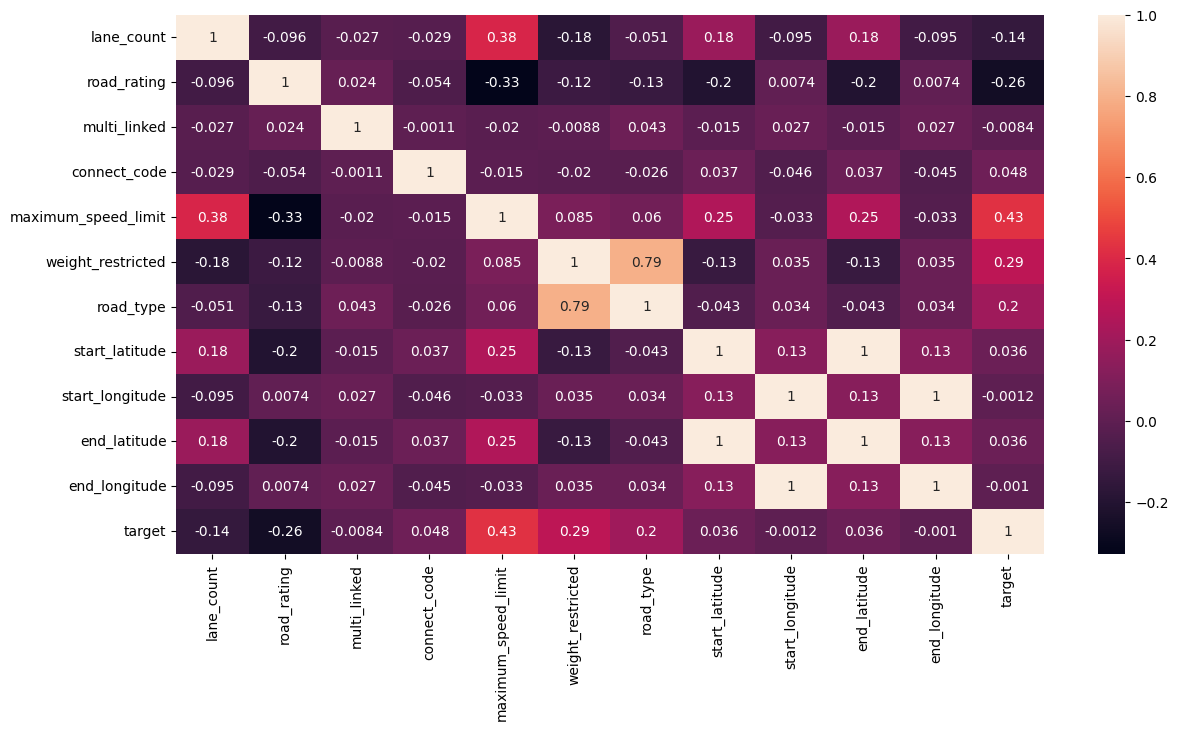

In [17]:
df_train[["base_date", "base_hour"]] = df_train[["base_date", "base_hour"]].astype(object) 
df_train.drop(['vehicle_restricted', 'height_restricted'], axis= 1, inplace=True)
plt.figure(figsize = (14,7))
sns.heatmap(df_train.corr(), annot = True)

In [18]:
df_train.maximum_speed_limit.value_counts()

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64

<AxesSubplot:xlabel='maximum_speed_limit', ylabel='Count'>

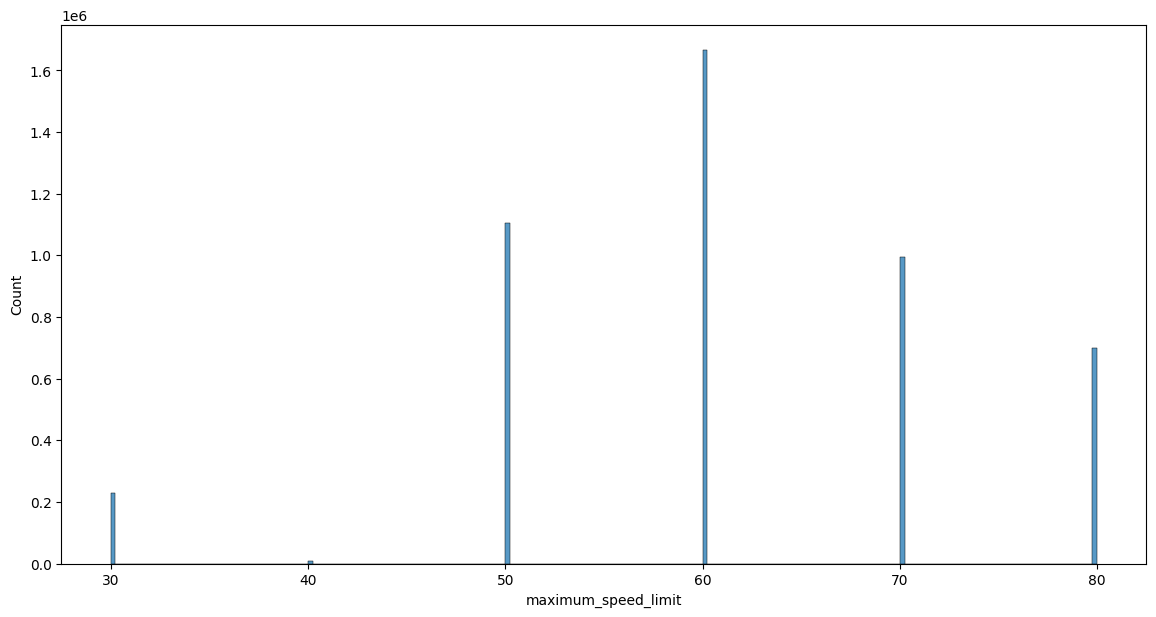

In [19]:
plt.figure(figsize = (14,7))
sns.histplot(df_train.maximum_speed_limit)

<AxesSubplot:xlabel='maximum_speed_limit', ylabel='target'>

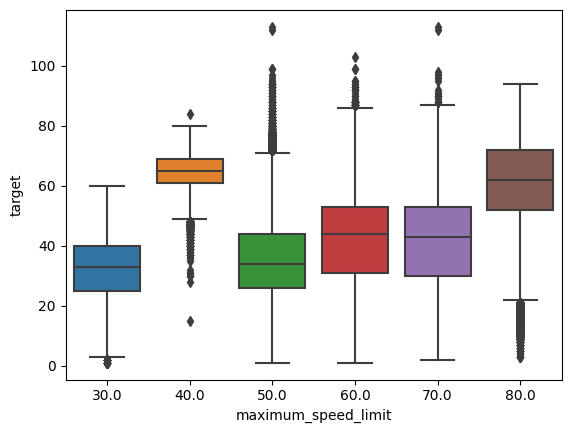

In [20]:
sns.boxplot(x="maximum_speed_limit", y="target", data=df_train)

In [21]:
df_train.lane_count.value_counts()

2    2352092
1    1558531
3     790594
Name: lane_count, dtype: int64

<AxesSubplot:xlabel='target', ylabel='Count'>

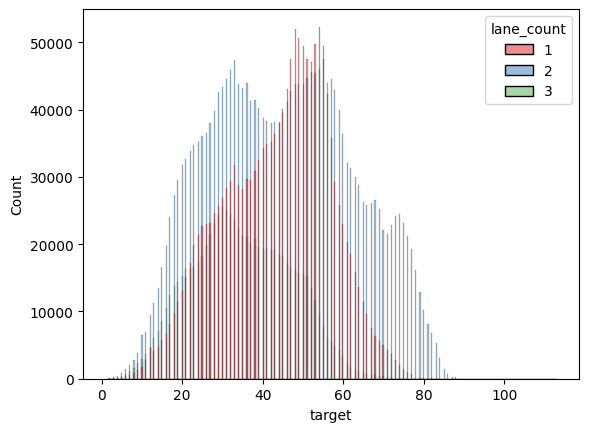

In [22]:
sns.histplot(x=df_train.target, hue=df_train.lane_count, palette='Set1')

<AxesSubplot:xlabel='lane_count', ylabel='target'>

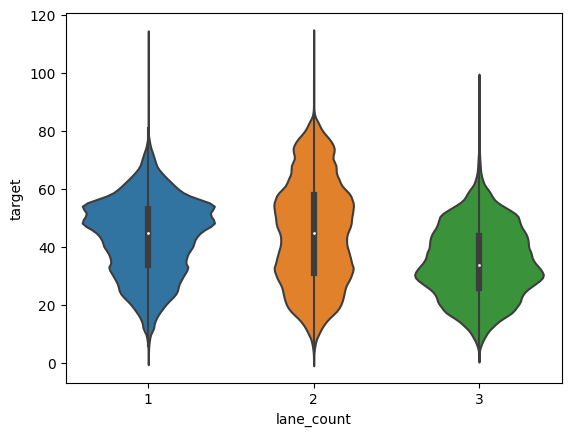

In [25]:
sns.violinplot(x=df_train.lane_count, y=df_train.target)

In [26]:
df_train.groupby("lane_count")["target"].mean()

lane_count
1    43.570560
2    44.915714
3    34.917782
Name: target, dtype: float32